<a href="https://colab.research.google.com/github/mehelisinha/Python-Programming/blob/main/exercises/machine-learning/unsupervised-learning/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a few clustering algorithms, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), and [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Train and evaluate clustering models (i.e., the clustering algorithm and its hyperparameters) to find out the best-performing model using clustering evaluation metrics, such as [elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) and the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Preprocess data
df = df.dropna()
features = ['Age', 'Income', 'Settlement size']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
print("\nPreprocessed Data Head:")
print(df.head())


Preprocessed Data Head:
          ID  Sex  Marital status       Age  Education    Income  Occupation  \
0  100000001    0               0  2.653614          2  0.097524           1   
1  100000002    1               1 -1.187132          1  0.782654           1   
2  100000003    0               0  1.117316          1 -0.833202           0   
3  100000004    0               0  0.775916          1  1.328386           1   
4  100000005    0               0  1.458716          1  0.736932           1   

   Settlement size  
0         1.552326  
1         1.552326  
2        -0.909730  
3         0.321298  
4         0.321298  


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import hdbscan
from sklearn.cluster import AgglomerativeClustering

In [34]:
df = pd.read_csv(r'https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/customers.csv')
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [35]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [37]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [39]:
# Dropping non-numeric columns
df = df.select_dtypes(include=[np.number])

# Check again if there are any missing values
df.isnull().sum()

# If there are missing values, handle them (e.g., impute with mean or median)
df.fillna(df.mean(), inplace=True)

In [41]:
# Feature Scaling
# KMeans is sensitive to the scale of the data, so we will standardize the features.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [70]:
#  K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [65]:
#  HDBSCAN Clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_model.fit_predict(df_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [66]:
#  Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(df_scaled)

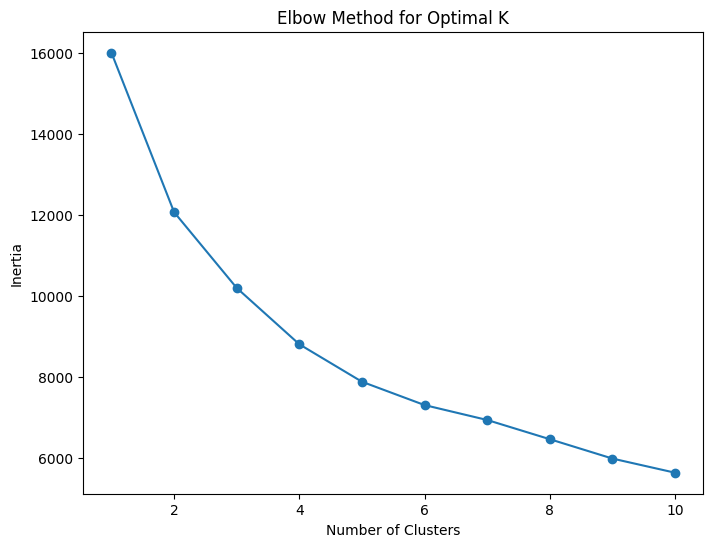

In [67]:
#Evaluate Clustering Performance

# 1. K-Means: Elbow Method to choose optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [68]:
#  K-Means: Silhouette Score
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.23465337166741693


In [69]:
#  HDBSCAN: to inspect the number of clusters
print(f'Number of clusters in HDBSCAN: {len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)}')

Number of clusters in HDBSCAN: 41


In [57]:
# Agglomerative Clustering: Silhouette Score
silhouette_agglo = silhouette_score(df_scaled, agglo_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')


Silhouette Score for Agglomerative Clustering: 0.20599582272559644


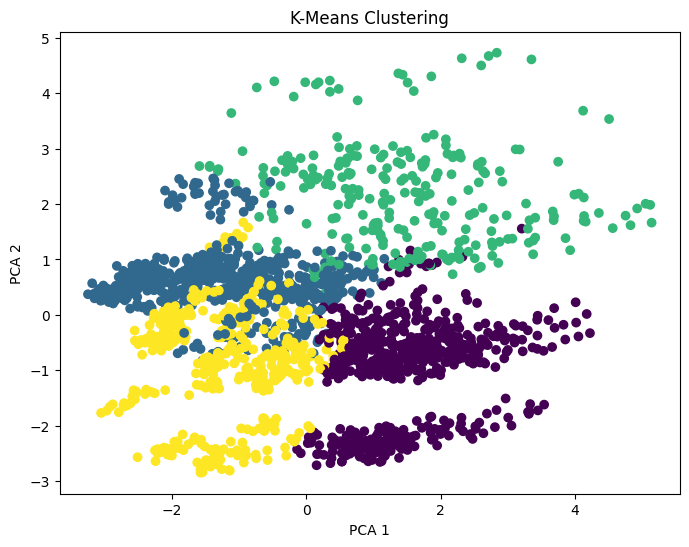

In [59]:
# Visualizing the Clusters
# Plot K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

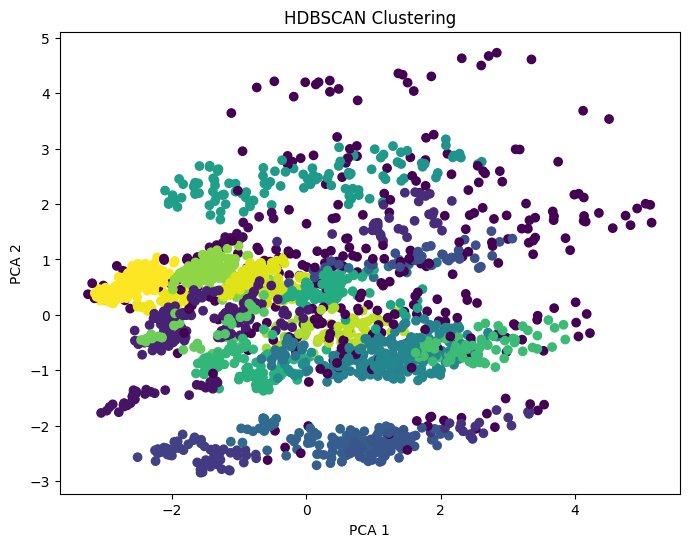

In [61]:
# Plot HDBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hdbscan_labels, cmap='viridis')
plt.title('HDBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

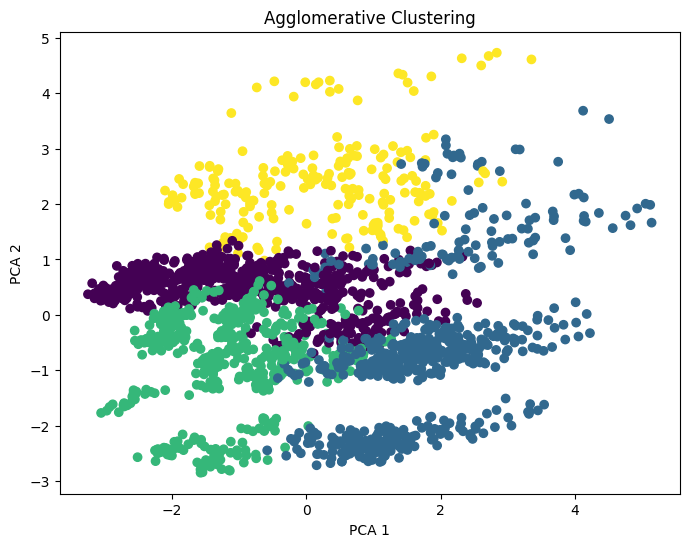

In [62]:
# Plot Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()